# Netflix Customer Churn Analysis

**Author:** Sarah Howard 

**Date:** November 3, 2025

**Objective:** Perform an analysis of customer churn

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Section 1. Import and Inspect the Data

### 1.1 Load the Netflix Customer Churn data

In [9]:
# Load the Netflix Customer Churn data from the data folder
df = pd.read_csv(r"C:\Repos\Netflix_Customer_Churn\data\netflix_large_user_data.csv", delimiter=",")

# Display info
df.info()

# Display the first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         1000 non-null   object 
 1   Subscription Length (Months)        1000 non-null   int64  
 2   Customer Satisfaction Score (1-10)  1000 non-null   int64  
 3   Daily Watch Time (Hours)            1000 non-null   float64
 4   Engagement Rate (1-10)              1000 non-null   int64  
 5   Device Used Most Often              1000 non-null   object 
 6   Genre Preference                    1000 non-null   object 
 7   Region                              1000 non-null   object 
 8   Payment History (On-Time/Delayed)   1000 non-null   object 
 9   Subscription Plan                   1000 non-null   object 
 10  Churn Status (Yes/No)               1000 non-null   object 
 11  Support Queries Logged              1000 non

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,C00001,12,10,4.85,4,Tablet,Action,Europe,On-Time,Basic,No,10,33,6250,5,2
1,C00002,12,8,1.75,9,Laptop,Thriller,Europe,On-Time,Basic,Yes,9,28,7018,1,5
2,C00003,3,4,2.75,9,Smart TV,Comedy,Asia,On-Time,Premium,Yes,3,18,1055,1,5
3,C00004,3,7,3.00,9,Smart TV,Drama,Europe,Delayed,Premium,No,5,32,6707,5,4
4,C00005,24,2,1.37,5,Mobile,Drama,North America,On-Time,Standard,Yes,2,59,1506,3,5
5,C00006,3,4,4.95,3,Tablet,Romance,Africa,Delayed,Basic,Yes,7,69,5581,4,3
6,C00007,12,4,0.71,3,Tablet,Thriller,Africa,Delayed,Standard,No,3,25,2238,2,3
7,C00008,6,5,3.54,2,Laptop,Romance,South America,On-Time,Standard,Yes,4,49,3630,5,3
8,C00009,6,9,3.79,1,Laptop,Drama,Africa,On-Time,Basic,Yes,6,27,4535,1,4
9,C00010,3,6,3.61,6,Laptop,Action,North America,On-Time,Premium,No,0,56,7395,2,1


### 1.2 Display basic summary statistics

In [16]:
# Check for missing statistics
df.isnull().values.any()
df.isnull().sum()/df.shape[0]

Customer ID                           0.0
Subscription Length (Months)          0.0
Customer Satisfaction Score (1-10)    0.0
Daily Watch Time (Hours)              0.0
Engagement Rate (1-10)                0.0
Device Used Most Often                0.0
Genre Preference                      0.0
Region                                0.0
Payment History (On-Time/Delayed)     0.0
Subscription Plan                     0.0
Churn Status (Yes/No)                 0.0
Support Queries Logged                0.0
Age                                   0.0
Monthly Income ($)                    0.0
Promotional Offers Used               0.0
Number of Profiles Created            0.0
dtype: float64

In [14]:
# Check for duplicates
df.drop_duplicates(inplace = True)

In [11]:
# Display summary statistics
print(df.describe())

       Subscription Length (Months)  Customer Satisfaction Score (1-10)  \
count                    1000.00000                         1000.000000   
mean                        9.17700                            5.379000   
std                         8.21859                            2.856487   
min                         1.00000                            1.000000   
25%                         3.00000                            3.000000   
50%                         6.00000                            5.000000   
75%                        12.00000                            8.000000   
max                        24.00000                           10.000000   

       Daily Watch Time (Hours)  Engagement Rate (1-10)  \
count               1000.000000             1000.000000   
mean                   2.829420                5.511000   
std                    1.302673                2.871607   
min                    0.500000                1.000000   
25%                    1.6500

array([[<Axes: title={'center': 'Subscription Length (Months)'}>,
        <Axes: title={'center': 'Customer Satisfaction Score (1-10)'}>,
        <Axes: title={'center': 'Daily Watch Time (Hours)'}>],
       [<Axes: title={'center': 'Engagement Rate (1-10)'}>,
        <Axes: title={'center': 'Support Queries Logged'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Monthly Income ($)'}>,
        <Axes: title={'center': 'Promotional Offers Used'}>,
        <Axes: title={'center': 'Number of Profiles Created'}>]],
      dtype=object)

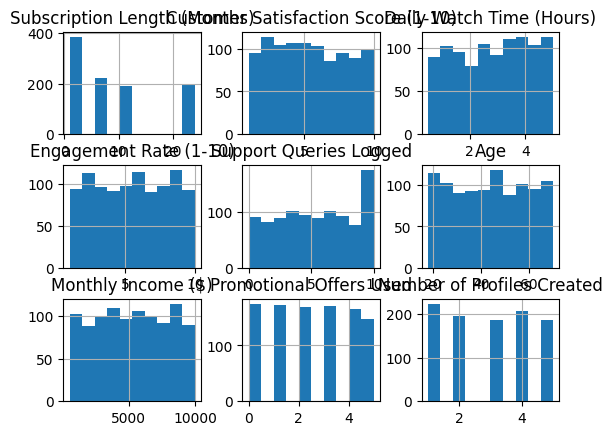

In [ ]:
# Data histograms
df.hist()